<a href="https://colab.research.google.com/github/fitsumM12/Time-Series-Analaysis/blob/main/Air_Passengers_Time_Series_Analysis_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import itertools
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv("/content/AirPassengers.csv")

In [37]:
# convert the 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

# set the index to the 'Month' column
df.set_index('Month', inplace=True)

In [38]:
df= df.rename(columns = {'#Passengers': 'Passengers'})

In [39]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [40]:
dataset = df.iloc[:,0].values

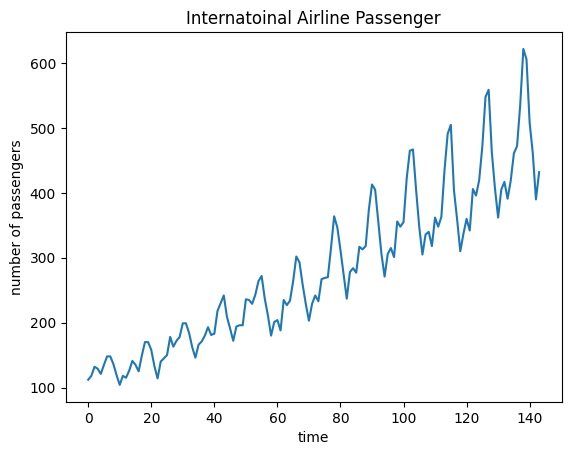

In [41]:
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('number of passengers')
plt.title('Internatoinal Airline Passenger')
plt.show()

In [42]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype('float32')
dataset.shape

(144, 1)

In [43]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [44]:
# Training data and testing data size
train_size = int(len(dataset)*0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print('train_size : {}, test_size : {}'.format(len(train),len(test)))

train_size : 72, test_size : 72


In [45]:
# Training data
timestamp=10
dataX = []
dataY = []
for i in range(len(train)-timestamp-1):
    a = train[i:(i+timestamp),0]
    dataX.append(a)
    dataY.append(train[i+timestamp,0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [46]:
# Testing data
timestep=10
dataX = []
dataY = []
for i in range(len(test)-timestamp-1):
    a = test[i:(i+timestamp),0]
    dataX.append(a)
    dataY.append(test[i+timestamp,0])
testX = np.array(dataX)
testY = np.array(dataY)

In [47]:
# Training and testing data
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [48]:
# Model
model = Sequential()
model.add(LSTM(10, input_shape=(1, timestamp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
61/61 [==============================] - 2s 2ms/step - loss: 0.0178
Epoch 2/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 3/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 4/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 5/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 6/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 7/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 8/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 9/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 10/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 11/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 12/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 13/50
61/61 [==============================

In [49]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 9ms/step
Train Score: 17.11 RMSE
Test Score: 41.35 RMSE


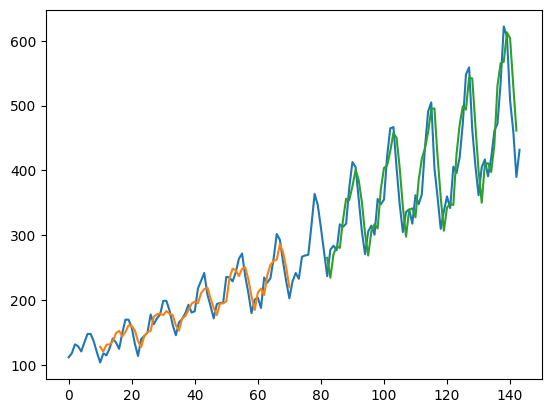

In [50]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestamp:len(trainPredict)+timestamp, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestamp*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()